 **Importing the files**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weightLogInfo_merged.csv to weightLogInfo_merged.csv


**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
weightLogInfo_merged = pd.read_csv('weightLogInfo_merged.csv')

In [ ]:
weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [ ]:
weightLogInfo_merged.shape

(67, 8)

**Data Cleaning**

In [ ]:
weightLogInfo_merged.isna().sum()

,0
Id,0
Date,0
WeightKg,0
WeightPounds,0
Fat,65
BMI,0
IsManualReport,0
LogId,0


In [ ]:
weightLogInfo_merged['Fat'] = weightLogInfo_merged['Fat'].fillna('00')

In [ ]:
weightLogInfo_merged['Fat'].isna().sum()

0

In [ ]:
# to convert Date in proper format
weightLogInfo_merged['Date'] = pd.to_datetime(weightLogInfo_merged['Date'])
weightLogInfo_merged['Date'] =pd.to_datetime(weightLogInfo_merged['Date']).dt.strftime('%d/%m/%Y %H:%M:%S')
weightLogInfo_merged['Date'] = weightLogInfo_merged['Date'].str.replace('/', '-')
weightLogInfo_merged.head()

<ipython-input-9-7b69e392a988>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weightLogInfo_merged['Date'] = pd.to_datetime(weightLogInfo_merged['Date'])


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,02-05-2016 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,03-05-2016 23:59:59,52.599998,115.963147,00,22.650000,True,1462319999000
2,1927972279,13-04-2016 01:08:52,133.500000,294.317120,00,47.540001,False,1460509732000
3,2873212765,21-04-2016 23:59:59,56.700001,125.002104,00,21.450001,True,1461283199000
4,2873212765,12-05-2016 23:59:59,57.299999,126.324875,00,21.690001,True,1463097599000


In [ ]:
weightLogInfo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             67 non-null     object 
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(3), int64(2), object(2)
memory usage: 3.9+ KB


In [ ]:
# Convert 'Fat' column to numeric, forcing errors to NaN (e.g., non-convertible values like 'NaN')
weightLogInfo_merged['Fat'] = pd.to_numeric(weightLogInfo_merged['Fat'], errors='coerce')

# Convert the 'Fat' column to integer type
weightLogInfo_merged['Fat'] = weightLogInfo_merged['Fat'].astype(int)


In [ ]:
weightLogInfo_merged['Date'] = pd.to_datetime(weightLogInfo_merged['Date'], format='%d-%m-%Y %H:%M:%S')

In [ ]:
weightLogInfo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             67 non-null     int64         
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3)
memory usage: 3.9 KB


In [ ]:
weightLogInfo_merged.describe()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67,67.000000,67.000000,67.000000,67.000000,6.700000e+01
mean,7.009282e+09,2016-04-27 15:39:54.283582208,72.035821,158.811801,0.701493,25.185224,1.461772e+12
min,1.503960e+09,2016-04-12 06:47:11,52.599998,115.963147,0.000000,21.450001,1.460444e+12
25%,6.962181e+09,2016-04-19 15:19:45,61.400002,135.363832,0.000000,23.959999,1.461079e+12
50%,6.962181e+09,2016-04-27 23:59:59,62.500000,137.788914,0.000000,24.389999,1.461802e+12
75%,8.877689e+09,2016-05-04 15:24:10.500000,85.049999,187.503152,0.000000,25.559999,1.462375e+12
max,8.877689e+09,2016-05-12 23:59:59,133.500000,294.317120,25.000000,47.540001,1.463098e+12
std,1.950322e+09,NaN,13.923206,30.695415,4.037757,3.066963,7.829948e+08


In [ ]:
weightLogInfo_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             67 non-null     int64         
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3)
memory usage: 3.9 KB


In [ ]:
weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,0,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,0,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,0,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,0,21.690001,True,1463097599000


In [ ]:
weightLogInfo_merged['IsManualReport'] = weightLogInfo_merged['IsManualReport'].replace({True:1, False:0})

In [ ]:
weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22,22.650000,1,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,0,22.650000,1,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,0,47.540001,0,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,0,21.450001,1,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,0,21.690001,1,1463097599000


**Data Visualization**

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
weightLogInfo_merged_grouped = weightLogInfo_merged.groupby('WeightKg')['BMI'].sum().reset_index()
fig = px.line(weightLogInfo_merged_grouped, x = 'WeightKg', y = 'BMI', title = 'WeightKg per BMI')
fig.show()

In [ ]:
weightLogInfo_merged_grouped = weightLogInfo_merged.groupby('WeightKg')['WeightPounds'].sum().reset_index()
fig = px.scatter(weightLogInfo_merged_grouped, x = 'WeightKg', y = 'WeightPounds', title = 'WeightKg per WeightPounds')
fig.show()

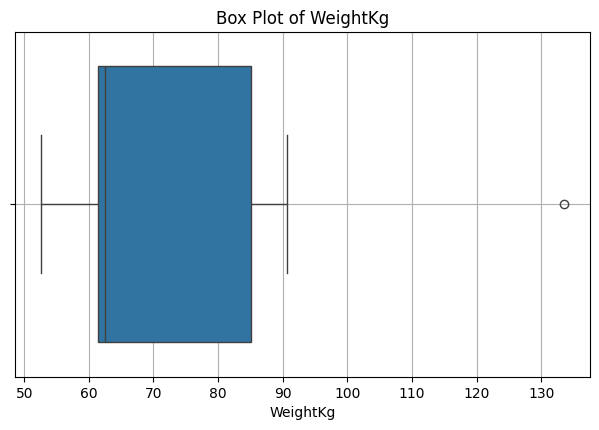

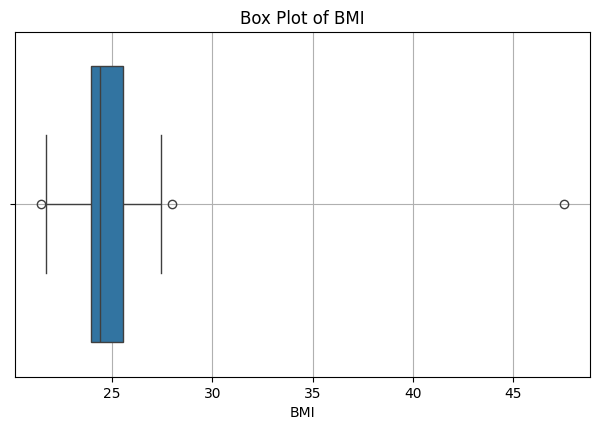

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x=weightLogInfo_merged['WeightKg'])
plt.title('Box Plot of WeightKg')
plt.xlabel('WeightKg')
plt.grid()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x=weightLogInfo_merged['BMI'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.grid()

plt.tight_layout()
plt.show()

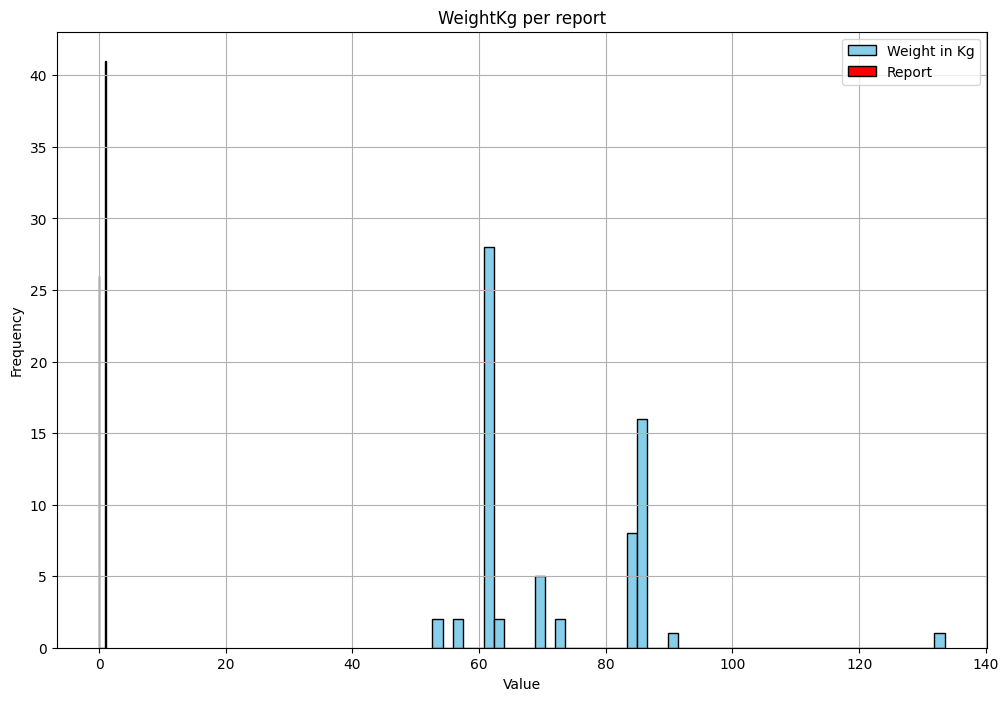

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(weightLogInfo_merged['WeightKg'], label='Weight in Kg', bins=50, color='skyblue', edgecolor='black')  # Use the 'WeightKg' column as data
plt.hist(weightLogInfo_merged['IsManualReport'], label='Report', bins=50, color='red', edgecolor='black')  # Use the 'IsManualReport' column as data
plt.title('WeightKg per report')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

In [ ]:
weightLogInfo_merged.to_csv('Weightlog.csv', index = False)